In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [20]:
df=pd.read_csv('rq1_cleaned.csv')
df.shape

(20593, 106)

In [12]:
df.columns
df=df.drop(['EQ5D_Round3', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round2'].notnull()]  # for example


In [13]:
full = df_linear.copy()

In [14]:
X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
## Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

features = coef_df['Feature'].values


Test MSE: 0.041
Test R²: 0.448
                    Feature  Coefficient
0               EQ5D_Round1     0.152615
3                occupation     0.022924
38        diag_Chronic pain    -0.020858
41        diag_Fibromyalgia    -0.018575
89           Linalool (PPM)     0.018503
96           Humulene (PPM)    -0.016492
80       alpha-Pinene (PPM)     0.016430
99     Total terpene (%w/w)     0.015769
42  diag_Multiple sclerosis    -0.015225
1                       Age    -0.015078


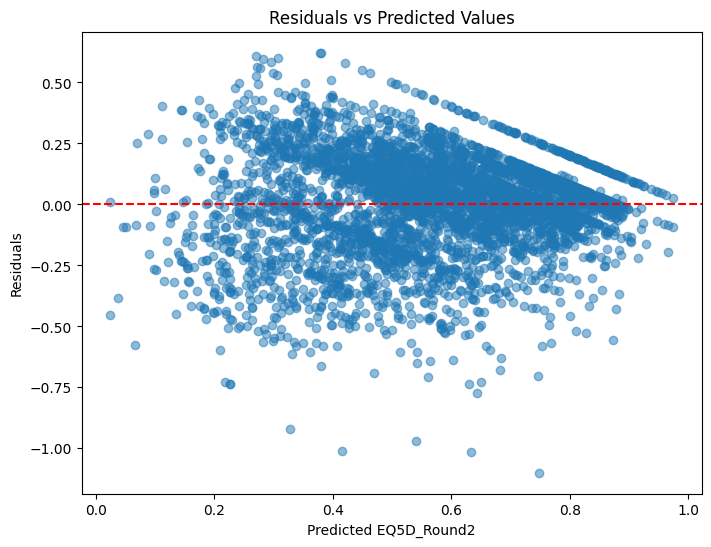

In [28]:
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted EQ5D_Round2")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [25]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


Test MSE: 0.041
Test R²: 0.448
                    Feature  Coefficient
0               EQ5D_Round1     0.152601
3                occupation     0.022924
38        diag_Chronic pain    -0.020854
41        diag_Fibromyalgia    -0.018572
89           Linalool (PPM)     0.018478
80       alpha-Pinene (PPM)     0.016399
96           Humulene (PPM)    -0.016379
99     Total terpene (%w/w)     0.015706
42  diag_Multiple sclerosis    -0.015223
1                       Age    -0.015077


In [27]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

print(f"Test MSE: {mse}")

Test MSE: 0.041
Test R²: 0.449
                                Feature  Coefficient
0                           EQ5D_Round1     0.153669
3                            occupation     0.022068
38                    diag_Chronic pain    -0.016144
41                    diag_Fibromyalgia    -0.015683
1                                   Age    -0.015368
42              diag_Multiple sclerosis    -0.012517
27                                  VTE    -0.007616
71                            form_Flos     0.007606
43                diag_Neuropathic pain    -0.006887
58  diag_Complex regional pain syndrome    -0.006660
Test MSE: 0.04102007461657698


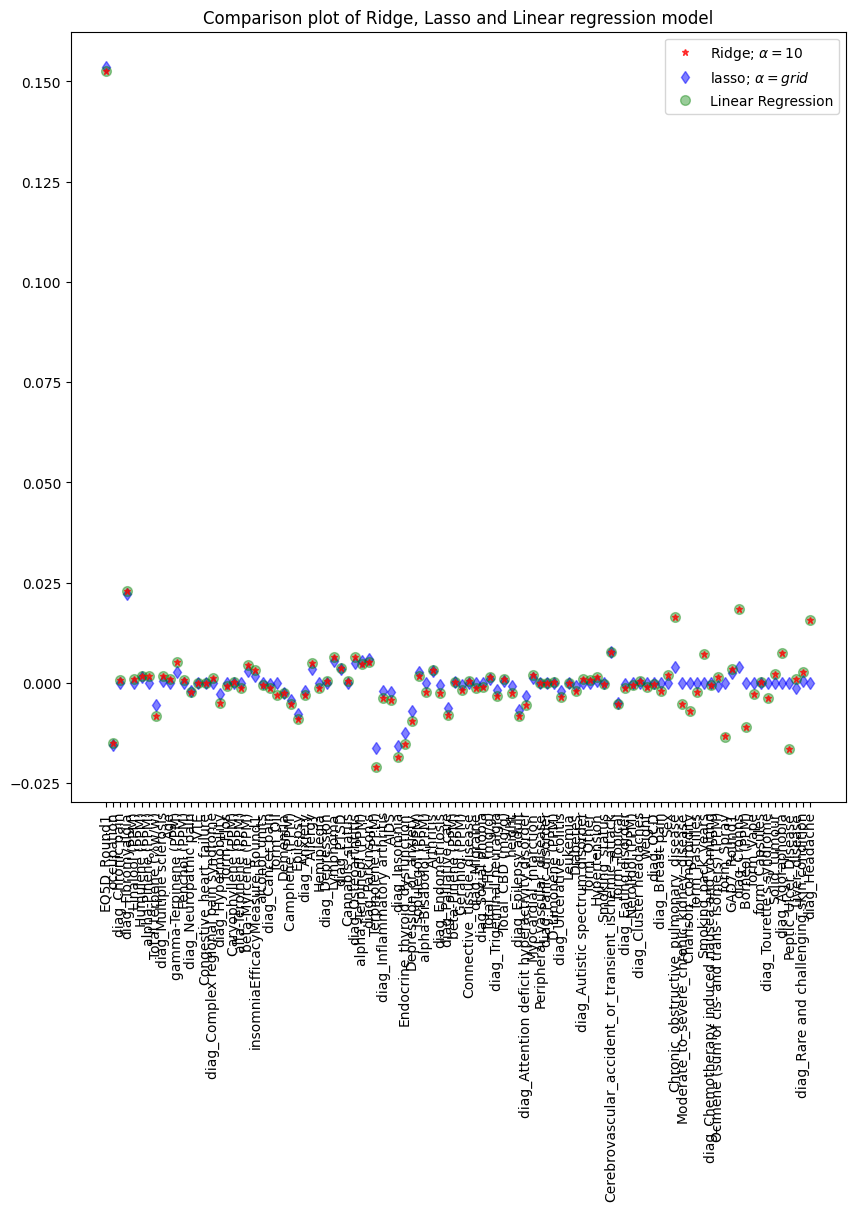

In [18]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


In [19]:
df.columns
df=df.drop(['EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round3'].notnull()]  
df_linear= df_linear[df_linear['EQ5D_Round2'].notnull()]  

KeyError: "['EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'] not found in axis"

In [11]:
full=df_linear.copy()

In [17]:
X=full.drop(['EQ5D_Round3','SID'], axis=1)
y=full['EQ5D_Round3']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
## Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

features = coef_df['Feature'].values


Test MSE: 0.029
Test R²: 0.593
                    Feature  Coefficient
1               EQ5D_Round2     0.148216
0               EQ5D_Round1     0.060891
4                occupation     0.015321
37        diag_Chronic pain    -0.009149
47       diag_Hypermobility    -0.008197
40        diag_Fibromyalgia    -0.007175
70                form_Flos     0.006884
17               Hemiplegia    -0.006068
2                       Age    -0.005521
41  diag_Multiple sclerosis    -0.005115


In [16]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


Test MSE: 0.029
Test R²: 0.593
                    Feature  Coefficient
1               EQ5D_Round2     0.148201
0               EQ5D_Round1     0.060895
4                occupation     0.015323
37        diag_Chronic pain    -0.009149
47       diag_Hypermobility    -0.008195
40        diag_Fibromyalgia    -0.007175
70                form_Flos     0.006883
17               Hemiplegia    -0.006068
2                       Age    -0.005521
41  diag_Multiple sclerosis    -0.005115


In [15]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

print(f"Test MSE: {mse}")

Test MSE: 0.028
Test R²: 0.594
               Feature  Coefficient
1          EQ5D_Round2     0.148527
0          EQ5D_Round1     0.061360
4           occupation     0.014626
37   diag_Chronic pain    -0.008517
2                  Age    -0.006002
40   diag_Fibromyalgia    -0.005779
47  diag_Hypermobility    -0.005493
70           form_Flos     0.004851
35     diag_Depression     0.004040
17          Hemiplegia    -0.003960
Test MSE: 0.028408391733132306
